In [1]:
# Data analysis library
import numpy as np
import pandas as pd

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# warning ignore library
import warnings
warnings.filterwarnings('ignore')

# to display all columns
pd.set_option('display.max_columns',None)

#timer
import time
from contextlib import contextmanager

# import models library
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from lightgbm import LGBMClassifier

In [2]:
@contextmanager
def timer(title):
    t0=time.time()
    yield
    print('{} done in {:.0f}s'.format(title,time.time()-t0))

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA of data

In [4]:
# check the null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# basic summay statistics about data
df.iloc[:,2:df.shape[1]].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
for var in df:
    if var != 'Exited':
        if len(list(df[var].unique())) <= 11:
               print(pd.DataFrame({'Mean_Exited' : df.groupby(var)['Exited'].mean()}),end='n\n\n')
               

           Mean_Exited
Geography             
France        0.161548
Germany       0.324432
Spain         0.166734n

        Mean_Exited
Gender             
Female     0.250715
Male       0.164559n

        Mean_Exited
Tenure             
0          0.230024
1          0.224155
2          0.191794
3          0.211100
4          0.205258
5          0.206522
6          0.202689
7          0.172179
8          0.192195
9          0.216463
10         0.206122n

               Mean_Exited
NumOfProducts             
1                 0.277144
2                 0.075817
3                 0.827068
4                 1.000000n

           Mean_Exited
HasCrCard             
0             0.208149
1             0.201843n

                Mean_Exited
IsActiveMember             
0                  0.268509
1                  0.142691n



## Visualization
    In this we are goining to illustrate the relationship between the variable by using visualization tool

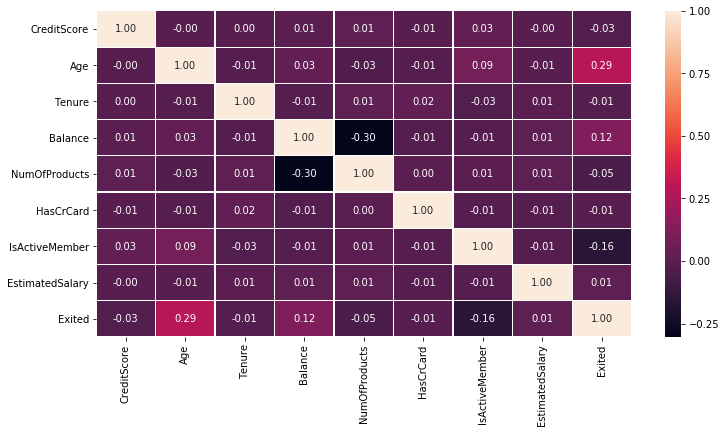

In [8]:
## correalation
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(df.loc[:,'Surname':'Exited'].corr(),annot=True,fmt='.2f',linewidths=.2,ax=ax)
plt.show()

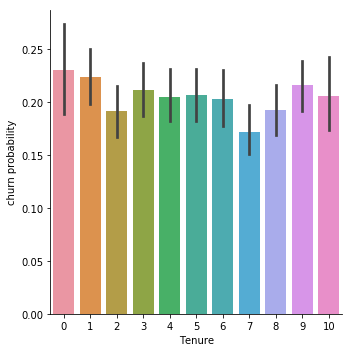

In [9]:
g=sns.factorplot(x='Tenure',y='Exited',data=df,kind='bar',size=5)
g.set_ylabels('churn probability')

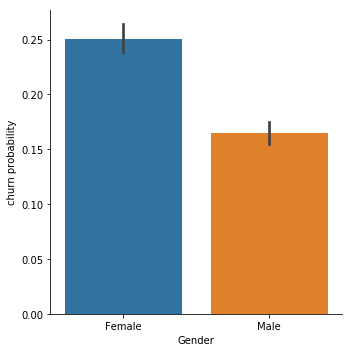

In [10]:
g=sns.factorplot(x='Gender',y='Exited',data=df,kind='bar',size=5)
g.set_ylabels('churn probability')

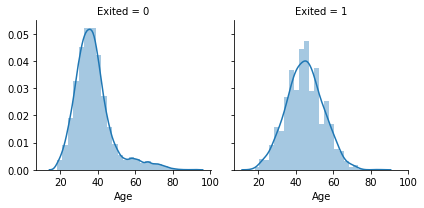

In [11]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

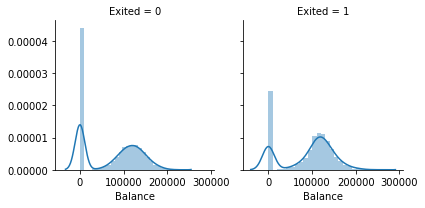

In [12]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

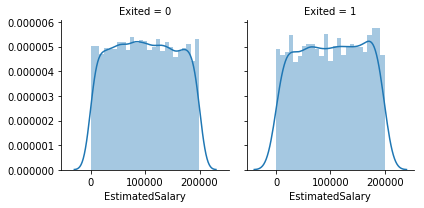

In [13]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

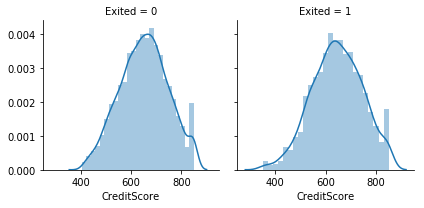

In [14]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

### Data preprocessing

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df['Gender']=np.where(df['Gender']=='Female',0,1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [18]:
df.shape

(10000, 15)

In [19]:
xs=df.drop(['RowNumber','Exited','Surname'],axis=1)
target=df['Exited']
x_train,x_val,y_train,y_val=train_test_split(xs,target,test_size=0.2,random_state=1)

In [20]:
x_train.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
2694,15721585,628,1,29,3,113146.98,2,0,1,124749.08,1,0
5140,15617790,626,0,29,4,105767.28,2,0,0,41104.82,0,0
2568,15775905,612,0,47,6,130024.87,1,1,1,45750.21,1,0
3671,15616666,646,0,52,6,111739.40,2,0,1,68367.18,1,0
7427,15664720,714,1,33,8,122017.19,1,0,0,162515.17,0,1


In [21]:
train_ids=x_train['CustomerId']
val_ids=x_val['CustomerId']
x_train=x_train.drop(['CustomerId'],axis=1)
x_val=x_val.drop(['CustomerId'],axis=1)

df_train=df[df['CustomerId'].isin(train_ids)]
df_val=df[df['CustomerId'].isin(val_ids)]

In [22]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
2694,628,1,29,3,113146.98,2,0,1,124749.08,1,0
5140,626,0,29,4,105767.28,2,0,0,41104.82,0,0
2568,612,0,47,6,130024.87,1,1,1,45750.21,1,0
3671,646,0,52,6,111739.40,2,0,1,68367.18,1,0
7427,714,1,33,8,122017.19,1,0,0,162515.17,0,1


In [23]:
r=1309
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),BaggingClassifier(random_state=r),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          XGBClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN","SVC","Bagging",
             "DecisionTree","Random_Forest","GBM","XGBoost"]

In [24]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_val))

Default model validation accuracies for the train data:

LogisticRegression : 0.785
GaussianNB : 0.785
KNN : 0.764
SVC : 0.792
Bagging : 0.847
DecisionTree : 0.795
Random_Forest : 0.863
GBM : 0.862
XGBoost : 0.859


### Cross validation accuracy and std of the default models for all the train data 

In [25]:
predictors=pd.concat([x_train,x_val])

In [26]:
results = []
print('10 fold Cross validation accuracy and std of the default models for the train data:', end = "\n\n")
for name, model in zip(names, models):
    kfold = KFold(n_splits=10, random_state=1001)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))

10 fold Cross validation accuracy and std of the default models for the train data:

LogisticRegression: 0.796 (0.010)
GaussianNB: 0.796 (0.010)
KNN: 0.763 (0.012)
SVC: 0.796 (0.010)
Bagging: 0.777 (0.011)
DecisionTree: 0.657 (0.014)
Random_Forest: 0.794 (0.011)
GBM: 0.795 (0.010)
XGBoost: 0.781 (0.012)


### Model tuning using crossvalidation 

In [27]:
# Possible hyper parameters
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
svc_params= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1, 5, 10 ,50 ,100],
                 "C": [1,10,50,100,200,300,1000]}
bag_params={"n_estimators":[50,120,300]}
dtree_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}
rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}

mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],"max_iter":[1000]}
catb_params =  {'depth':[2, 3, 4],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg':np.arange(2,31)}
classifier_params = [logreg_params,NB_params,knn_params,svc_params,bag_params,dtree_params,rf_params,
                     gbm_params, xgb_params,mlpc_params,catb_params]  

In [28]:
# Tuning by Cross Validation  
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv =10, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(x_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

LogisticRegression cross validation accuracy : 0.813
>Model tuning done in 147s
GaussianNB cross validation accuracy : 0.797
>Model tuning done in 2s
KNN cross validation accuracy : 0.795
>Model tuning done in 4s
SVC cross validation accuracy : 0.797
>Model tuning done in 2314s
Bagging cross validation accuracy : 0.856
>Model tuning done in 39s
DecisionTree cross validation accuracy : 0.859
>Model tuning done in 15s
Random_Forest cross validation accuracy : 0.865
>Model tuning done in 1027s
GBM cross validation accuracy : 0.865
>Model tuning done in 1329s
XGBoost cross validation accuracy : 0.867
>Model tuning done in 1023s


In [29]:
accuracies={}
print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_val)
    accuracy=accuracy_score(y_pred, y_val)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy

Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.812
GaussianNB : 0.792
KNN : 0.793
SVC : 0.792
Bagging : 0.864
DecisionTree : 0.856
Random_Forest : 0.867
GBM : 0.862
XGBoost : 0.869


###  Ensembling first n (e.g. 3) models 

In [30]:
n=3
accu=sorted(accuracies, reverse=True, key= lambda k:accuracies[k])[:n]
firstn=[[k,v] for k,v in best_estimators.items() if k in accu]

In [31]:
# Ensembling First n Score

votingC = VotingClassifier(estimators = firstn, voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_val),y_val))

0.8675
